Modules nécessaires : 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [2]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-06 09:45:39,487 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-06 09:45:39,487 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-06 09:45:39,498 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-06 09:45:39,499 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-06 09:45:39,581 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-06 09:45:40,832 - HiggsML.datasets     - INFO     - Data loaded successfully


In [3]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [4]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [5]:
path.append(submission_dir)
from model import Model

Testing Settings

In [6]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [7]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [8]:
def graphique(E, S, xlabel, ylabel, title_):
    plt.plot(E, S, marker='o', linestyle='-', color='b')
    plt.title(title_)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

Significance

In [9]:

def optimization(train_data): 
    L_epochs = np.linspace(25, 25, 1)
    sigmax = 0
    epochs_max = 1
    auc_max = 0
    S = []
    E = []
    A = []
    for k in range(len(L_epochs)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.epochs = int(L_epochs[k])
        print(ingestion.model.model.epochs)
        ingestion.fit_submission()
        sig1 = ingestion.model.sig
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_epochs[k]))
        A.append(ingestion.model.auc)
        if sig1>sigmax: 
            sigmax = sig1
            auc_max = ingestion.model.auc
            epochs_max = int(L_epochs[k])
    graphique(E, S, 'epochs', 'significance', 'Significance en fonction de epochs')
    graphique(E, A, 'epochs', 'AUC', 'Significance en fonction de AUC')
    
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

Paramètres par défauts : 
300 000 données initiales
batchsize = 16
number_of_layers = 10
width = 300
activation = 'relu'

2025-06-06 09:45:42,267 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-06 09:45:42,284 - HiggsML.datasets     - INFO     - Selected train size: 100000
2025-06-06 09:45:42,717 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-06 09:45:42,750 - HiggsML.datasets     - INFO     - Selected train size: 100000


sum_signal_weights:  668.5904799117505
sum_bkg_weights:  105050.40952008821


2025-06-06 09:45:43,127 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-06 09:45:43,166 - HiggsML.datasets     - INFO     - Selected train size: 100000



Valid Data:  (100000, 28)
Valid Labels:  (100000,)
Valid Weights:  (100000,)
sum_signal_weights:  672.8036955994801
sum_bkg_weights:  105046.1963044005


2025-06-06 09:45:43,545 - HiggsML.datasets     - INFO     - Data loaded successfully



sum_signal_weights:  674.6164280601547
sum_bkg_weights:  105044.38357193986
 
 
Training Data:  (100000, 28)
DEBUG: model_type = 'NN'


2025-06-06 09:45:43,943 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model


 Model is NN
25
Epoch 1/25
782/782 - 17s - 22ms/step - accuracy: 0.8007 - loss: 0.9926
Epoch 2/25
782/782 - 13s - 17ms/step - accuracy: 0.8174 - loss: 0.9427
Epoch 3/25
782/782 - 13s - 17ms/step - accuracy: 0.8198 - loss: 0.9328
Epoch 4/25
782/782 - 13s - 17ms/step - accuracy: 0.8189 - loss: 0.9246
Epoch 5/25
782/782 - 13s - 17ms/step - accuracy: 0.8226 - loss: 0.9199
Epoch 6/25
782/782 - 13s - 16ms/step - accuracy: 0.8202 - loss: 0.9254
Epoch 7/25
782/782 - 13s - 17ms/step - accuracy: 0.8227 - loss: 0.9130
Epoch 8/25
782/782 - 13s - 17ms/step - accuracy: 0.8215 - loss: 0.9082
Epoch 9/25
782/782 - 14s - 17ms/step - accuracy: 0.8232 - loss: 0.8999
Epoch 10/25
782/782 - 14s - 18ms/step - accuracy: 0.8247 - loss: 0.9026
Epoch 11/25
782/782 - 13s - 17ms/step - accuracy: 0.8117 - loss: 1.0045
Epoch 12/25
782/782 - 14s - 17ms/step - accuracy: 0.8248 - loss: 0.9138
Epoch 13/25
782/782 - 13s - 17ms/step - accuracy: 0.8246 - loss: 0.9071
Epoch 14/25
782/782 - 13s - 17ms/step - accuracy: 0.8266 

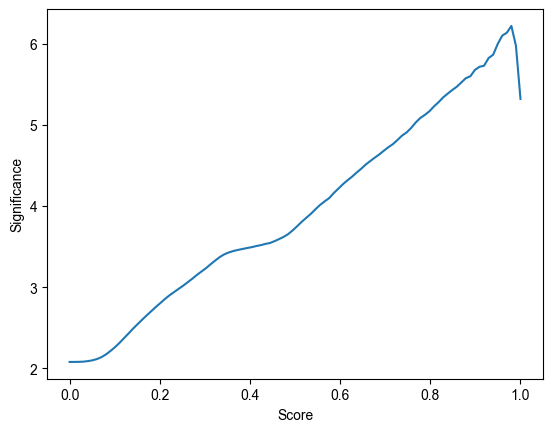

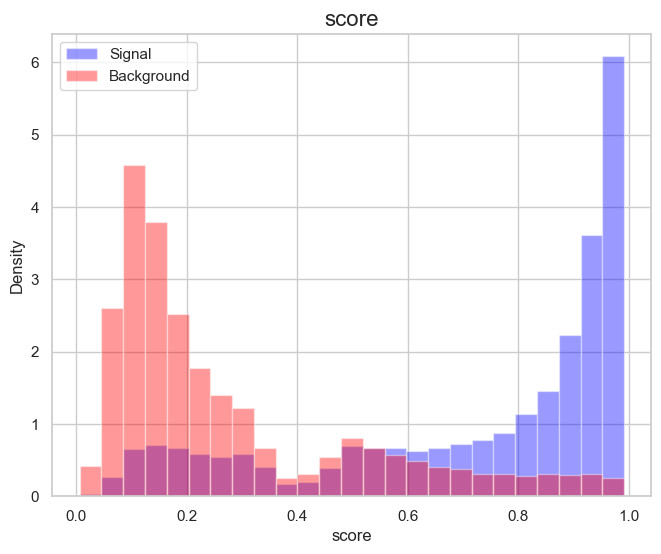

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


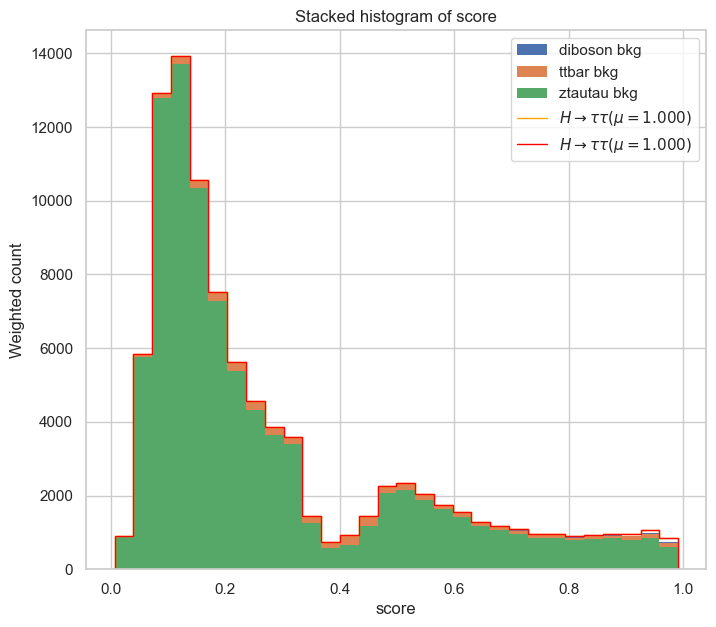

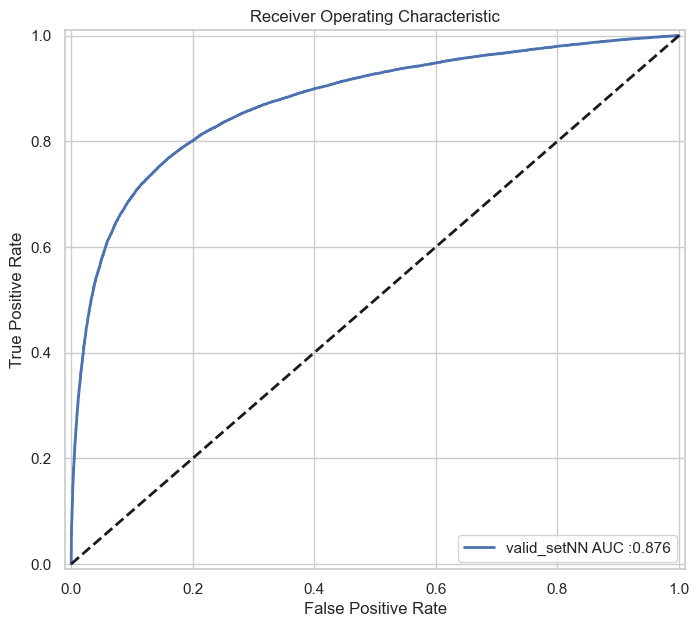

6.216622522619177


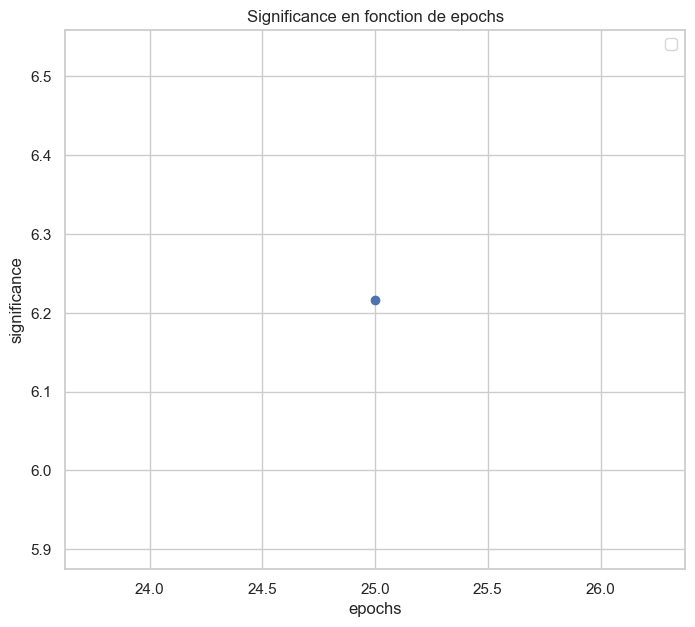

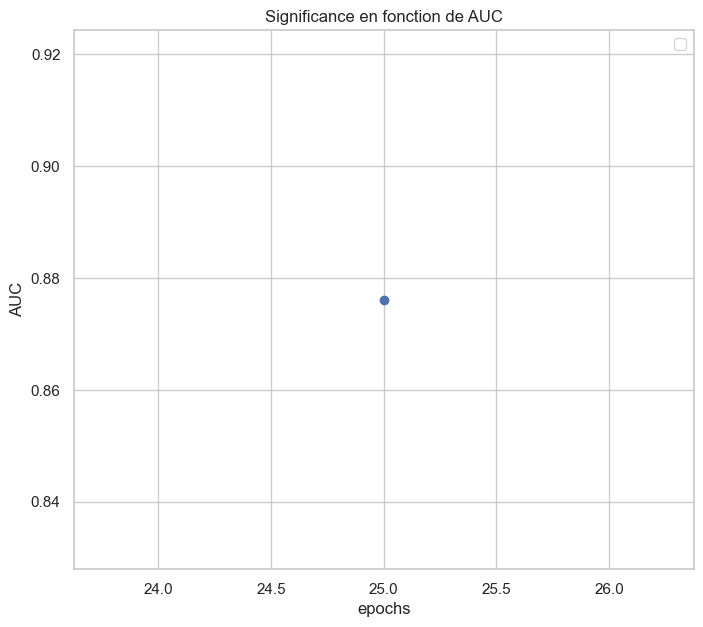

(np.float64(6.216622522619177), 25)

In [10]:
optimization(data_set)